<a href="https://colab.research.google.com/github/Eliezer19Garcia/Machine_Learning/blob/main/Clustering(ML_S10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Clustering
Los métodos de clustering tienen como usos:

Segmentar un dataset para comprender sus características intrínsecas y encontrar grupos de elementos similares.

Detectar elementos anómalos (esto es, elementos que no pertenecen a ningún grupo).

Simplificar datasets al agrupar conjuntos de variables con valores similares.

Al tratarse de un método no supervisado, las etiquetas que proporcionan pueden no tener un sentido muy definido. En este sentido, es el investigador quien debe darle un sentido a cada una de estas etiquetas.

##K medias
Se trata de quizás el método más sencillo para hacer clustering. Supongamos que somos un supermercado y queremos entender a nuestros clientes para mejorar nuestras campañas de publicidad.

Mediante encuestas conseguimos un muestreo de 50,000 clientes y para cada uno de ellos conocemos el valor medio de su gasto en nuestro supermercado por semana y su edad.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
# Import data

vehiculos = pd.read_csv('vehiculos_procesado_con_grupos.csv').drop(
            ['year',"fabricante", "modelo", "transmision", "traccion", "clase", "combustible", "consumo"],
    axis=1)
vehiculos.head()

,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


In [ ]:
datos_numericos = vehiculos.select_dtypes([int, float])

datos_categoricos = vehiculos.select_dtypes([object, 'category'])

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_imputer = Pipeline(
[    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())]
)

categorical_imputer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor =ColumnTransformer(
[        ('numeric', numeric_imputer, datos_numericos.columns),
        ('categorical', categorical_imputer, datos_categoricos.columns)
])

pipeline= Pipeline([
    ('preprocessor', preprocessor)
])


In [ ]:
vehiculos_procesado= pipeline.fit_transform(vehiculos)

vehiculos_procesado = pd.DataFrame(vehiculos_procesado, columns=preprocessor.get_feature_names_out())
display(vehiculos_procesado.head())
print(vehiculos_procesado.shape)

,numeric__desplazamiento,numeric__cilindros,numeric__co2,numeric__consumo_litros_milla,categorical__clase_tipo_Camionetas,categorical__clase_tipo_Coche Familiar,categorical__clase_tipo_Coches Grandes,categorical__clase_tipo_Coches Medianos,categorical__clase_tipo_Coches pequeños,categorical__clase_tipo_Deportivos,...,categorical__consumo_tipo_alto,categorical__consumo_tipo_bajo,categorical__consumo_tipo_moderado,categorical__consumo_tipo_muy alto,categorical__consumo_tipo_muy bajo,categorical__co2_tipo_alto,categorical__co2_tipo_bajo,categorical__co2_tipo_moderado,categorical__co2_tipo_muy alto,categorical__co2_tipo_muy bajo
0,-0.604304,-0.993503,0.417224,0.426558,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.645798,0.144209,1.770818,1.783535,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.604304,-0.993503,0.692173,0.702194,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.645798,0.144209,1.770818,1.783535,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.351656,0.144209,0.692173,0.702194,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


(36791, 35)


## K-Means

In [ ]:
from sklearn.cluster import KMeans

k_means=KMeans(random_state=42, n_clusters=8)

k_means.fit(vehiculos_procesado)


KMeans(random_state=42)

Dado que es aprendizaje supervisado, nos interesan los clusters. Aquí no hay entrenamiento y prueba por que no tenemos columna objetivo, al igual que no hay sentido en la validación cruzada

In [ ]:
clusters = k_means.labels_
clusters


array([6, 3, 6, ..., 7, 1, 7], dtype=int32)

Tambien podemos predecir clusters para nuevos datos

In [ ]:
preds = k_means.predict(vehiculos_procesado)
preds

array([6, 3, 6, ..., 7, 1, 7], dtype=int32)

Tambien podemos saber en donde quedaron los centroides

In [ ]:
k_means.cluster_centers_

array([[ 1.48274085e+00,  1.32590041e+00,  4.52251196e-01,
         3.72386648e-01,  2.04841040e-01,  3.35982659e-02,
         1.40534682e-01,  1.13800578e-01,  2.80708092e-01,
         1.60765896e-01,  3.10693642e-02,  3.46820809e-02,
         2.53251445e-01,  7.46748555e-01,  8.29479769e-01,
         1.70520231e-01, -7.32920669e-17,  3.07442197e-01,
         2.64812139e-01,  4.27745665e-01,  1.56069364e-01,
         3.61271676e-04,  8.43569364e-01,  6.60582700e-15,
         3.02535774e-15,  6.14884393e-01,  3.86560694e-02,
         3.44653179e-01,  1.80635838e-03, -6.21724894e-15,
         5.76950867e-01,  2.13150289e-02,  2.68786127e-01,
         1.32947977e-01, -1.24067423e-14],
       [-9.73620282e-01, -9.32591419e-01, -1.23081532e+00,
        -1.21404234e+00,  7.77806585e-04,  1.10189266e-01,
         2.77417682e-02,  1.81228934e-01,  5.46279492e-01,
         1.27819549e-01,  1.29634431e-03,  4.66683951e-03,
         1.42079336e-01,  8.57920664e-01,  1.00000000e+00,
        -5.82

In [ ]:
k_means.inertia_

118000.52778481797

In [ ]:
k_means.cluster_centers_.shape # 8 centros cada uno con 35 coordenadas

(8, 35)

In [ ]:
from sklearn.metrics import euclidean_distances, silhouette_score

distancias_centroides = euclidean_distances(k_means.cluster_centers_,k_means.cluster_centers_)
distancias_centroides # eucliden distances between centroids


array([[0.        , 4.59723543, 3.10365004, 2.5024569 , 3.73737164,
        2.2718738 , 2.32719277, 4.87182922],
       [4.59723543, 0.        , 2.90078655, 5.91002076, 2.34845108,
        3.55397306, 3.88481857, 1.45325259],
       [3.10365004, 2.90078655, 0.        , 4.27584564, 2.16794679,
        1.70974543, 2.3950797 , 3.13432064],
       [2.5024569 , 5.91002076, 4.27584564, 0.        , 4.92266507,
        3.67072575, 2.93458863, 6.11083943],
       [3.73737164, 2.34845108, 2.16794679, 4.92266507, 0.        ,
        2.80996281, 2.91486147, 2.54719962],
       [2.2718738 , 3.55397306, 1.70974543, 3.67072575, 2.80996281,
        0.        , 2.2724717 , 3.86639195],
       [2.32719277, 3.88481857, 2.3950797 , 2.93458863, 2.91486147,
        2.2724717 , 0.        , 4.06787826],
       [4.87182922, 1.45325259, 3.13432064, 6.11083943, 2.54719962,
        3.86639195, 4.06787826, 0.        ]])

In [ ]:

list(zip(np.argmax(distancias_centroides, axis=1), np.max(distancias_centroides, axis=1))) # Which is the farest centroid to the i-simo centroid

[(np.int64(7), np.float64(4.871829220542644)),
 (np.int64(3), np.float64(5.910020762265147)),
 (np.int64(3), np.float64(4.275845635506455)),
 (np.int64(7), np.float64(6.110839433954632)),
 (np.int64(3), np.float64(4.922665073072219)),
 (np.int64(7), np.float64(3.866391946800942)),
 (np.int64(7), np.float64(4.067878263895778)),
 (np.int64(3), np.float64(6.110839433954632))]

In [ ]:
def resumen_cluster(cluster_id):
    cluster = vehiculos[clusters==cluster_id]
    resumen_cluster = cluster[datos_categoricos.columns].mode().to_dict(orient="records")[0]
    resumen_cluster.update(cluster[datos_numericos.columns].mean().to_dict())
    resumen_cluster["cluster_id"] = cluster_id
    return resumen_cluster

def comparar_clusters(*cluster_ids):
    resumenes = []
    for cluster_id in cluster_ids:
        resumenes.append(resumen_cluster(cluster_id))
    return pd.DataFrame(resumenes).set_index("cluster_id").T

In [ ]:
resumen_cluster(0)

{'clase_tipo': 'Coches pequeños',
 'traccion_tipo': 'dos',
 'transmision_tipo': 'Automatica',
 'combustible_tipo': 'Premium',
 'tamano_motor_tipo': 'muy grande',
 'consumo_tipo': 'alto',
 'co2_tipo': 'alto',
 'desplazamiento': 5.338150289017341,
 'cilindros': 8.077312138728324,
 'co2': 526.9270532507951,
 'consumo_litros_milla': 0.21993606526991136,
 'cluster_id': 0}

In [ ]:
comparar_clusters(3,7)

cluster_id,3,7
clase_tipo,Camionetas,Coches pequeños
traccion_tipo,dos,dos
transmision_tipo,Automatica,Manual
combustible_tipo,Normal,Normal
tamano_motor_tipo,muy grande,muy pequeño
consumo_tipo,muy alto,muy bajo
co2_tipo,muy alto,muy bajo
desplazamiento,5.377714,1.843043
cilindros,8.353548,3.969512
co2,674.454242,330.07781


En el Análisis exploratorio de datos a veces es importante incluir un clustering para indicar posibles grupos naturales en el dataset.

In [ ]:

def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def resumen_grafico_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

In [ ]:
cluster_results = kmeans_cluster(vehiculos_procesado, 8)
cluster_summary = resumen_grafico_clustering(cluster_results)

In [ ]:
cluster_summary

,categorical__clase_tipo_Camionetas,categorical__clase_tipo_Coche Familiar,categorical__clase_tipo_Coches Grandes,categorical__clase_tipo_Coches Medianos,categorical__clase_tipo_Coches pequeños,categorical__clase_tipo_Deportivos,categorical__clase_tipo_Furgoneta,categorical__clase_tipo_Vehículos Especiales,categorical__co2_tipo_alto,categorical__co2_tipo_bajo,...,categorical__tamano_motor_tipo_muy pequeño,categorical__tamano_motor_tipo_pequeño,categorical__traccion_tipo_cuatro,categorical__traccion_tipo_dos,categorical__transmision_tipo_Automatica,categorical__transmision_tipo_Manual,numeric__cilindros,numeric__co2,numeric__consumo_litros_milla,numeric__desplazamiento
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.204841,0.033598,0.140535,0.113801,0.280708,0.160766,0.031069,0.034682,0.576951,0.021315,...,0.000000,0.000000,0.253251,0.746749,0.829480,0.170520,1.325900,0.452251,0.372387,1.482741
1,0.000778,0.110189,0.027742,0.181229,0.546279,0.127820,0.001296,0.004667,0.000000,0.016334,...,0.707545,0.232823,0.142079,0.857921,1.000000,0.000000,-0.932591,-1.230815,-1.214042,-0.973620
2,0.119108,0.109145,0.040297,0.136208,0.344833,0.140669,0.041041,0.068699,0.004164,0.000000,...,0.073457,0.292937,0.284312,0.715688,0.693829,0.306171,-0.257776,-0.066767,-0.064257,-0.403118
3,0.324793,0.003502,0.043871,0.040737,0.161843,0.167005,0.175300,0.082949,0.001290,0.000000,...,0.000000,0.000184,0.392627,0.607373,0.793917,0.206083,1.483039,1.693725,1.710503,1.511834
4,0.060214,0.095271,0.045230,0.152736,0.452846,0.142150,0.007561,0.043992,0.001100,0.990377,...,0.291861,0.382321,0.221886,0.778114,0.632939,0.367061,-0.597029,-0.559258,-0.555307,-0.589603
5,0.097842,0.028274,0.170015,0.209449,0.267485,0.147693,0.049107,0.030134,0.013765,0.013021,...,0.000000,0.000000,0.254836,0.745164,0.843006,0.156994,0.478158,-0.016040,-0.013799,0.481219
6,0.346457,0.009899,0.005174,0.023172,0.079190,0.210799,0.157030,0.168279,0.692013,0.000675,...,0.004724,0.061642,0.488864,0.511136,0.661642,0.338358,0.071902,0.722919,0.733141,0.242718
7,0.018011,0.124411,0.006373,0.092269,0.709615,0.036298,0.002217,0.010806,0.002494,0.004433,...,0.798005,0.201995,0.044334,0.955666,0.000000,1.000000,-1.010566,-1.204279,-1.213070,-1.087098


In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [14, 14]

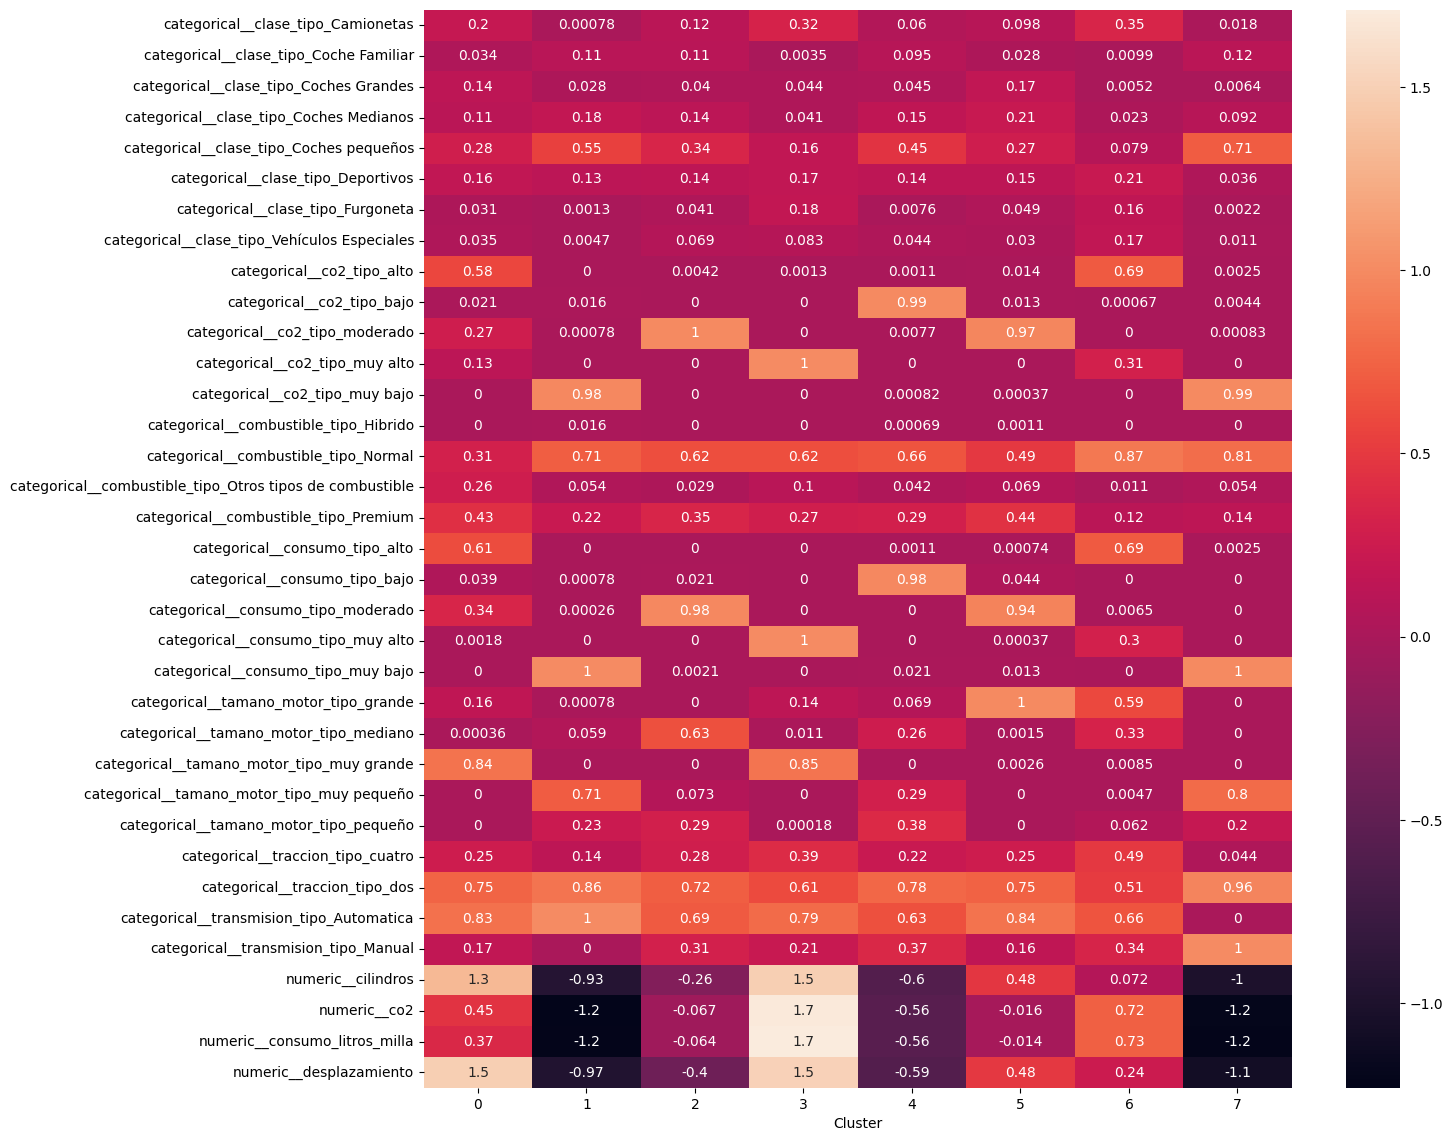

In [ ]:
sns.heatmap(cluster_summary.transpose(), annot=True);

##**¿Cómo elegir K?**
Hay varias opciones para elegir K

**1.  Conocimiento de dominio** A veces es posible tomar una decisión razonable a priori respecto al número de clusters que queremos. Por ejemplo, supongamos que queremos agrupar un conjunto de películas. Un valor razonable de K sería el número de categorías de películas en IMDB.


**2.  Decisión de negocio** Hay veces que la decisión del número de clusters viene dada por el negocio. Por ejemplo, supongamos que estamos agrupando un conjunto de invitados a un banquete. En ese caso el valor de K vendría dado por el número disponible de mesas.

**3.  Método del codo elbow method:** El método del codo usa como métrica el porcentaje de la varianza explicado como factor respecto al número de clusters. Se intenta buscar aquel número de clusters donde el añadir un cluster más no aumente demasiado dicho porcentaje (es decir, el "codo" de la gráfica que representa esto implica llegar al punto de ganancias decrecientes, donde añadir un cluster nuevo no reduce la varianza de forma significativa. El porcentaje de la varianza se representa como la variance entre grupos dividida de la varianza total

In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
print(cdist.__doc__)


    Compute distance between each pair of the two collections of inputs.

    See Notes for common calling conventions.

    Parameters
    ----------
    XA : array_like
        An :math:`m_A` by :math:`n` array of :math:`m_A`
        original observations in an :math:`n`-dimensional space.
        Inputs are converted to float type.
    XB : array_like
        An :math:`m_B` by :math:`n` array of :math:`m_B`
        original observations in an :math:`n`-dimensional space.
        Inputs are converted to float type.
    metric : str or callable, optional
        The distance metric to use. If a string, the distance function can be
        'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
        'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon',
        'kulczynski1', 'mahalanobis', 'matching', 'minkowski',
        'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener',
        'sokalsneath', 'sqeuclidean', 'yule'.
    **kwargs : dict, optio

In [ ]:

varianza_total = cdist(XA=vehiculos_procesado, XB=np.array([vehiculos_procesado.mean()]))

In [ ]:
suma_varianza_total = varianza_total.sum()

In [ ]:
suma_varianza_total

np.float64(103789.5605436006)

Ahora creamos funciones para calcular varianza intra cluster (wss) y la medida de varianza explicada (definida como la reduccion de la varianza en porcentaje respecto a la varianza máxima (que sería la varianza para k=1).

In [ ]:
def varianza_cluster(cluster_id, centroide_cluster, etiquetas_clusters):
    elementos_cluster = vehiculos_procesado[etiquetas_clusters==cluster_id]
    return cdist(XA=elementos_cluster, XB=np.array([centroide_cluster])).sum()

def medida_varianza(estimador_kmedias, suma_varianza_total):
    etiquetas_clusters = estimador_kmedias.labels_
    wss = 0
    for i, cluster_id in enumerate(np.unique(etiquetas_clusters)):
        centroide_cluster = estimador_kmedias.cluster_centers_[i]
        wss += varianza_cluster(cluster_id, centroide_cluster, etiquetas_clusters)
    return (suma_varianza_total-wss) / suma_varianza_total

In [ ]:
def medida_inercia(estimador_kmedias):
    return estimador_kmedias.inertia_

Ahora creamos una funcion que evalue para un valor de k las dos métricas

In [ ]:
def evaluar_k_kmedias(k, medida, **kwargs):
    if medida=="inercia":
        funcion_medida = medida_inercia
    elif medida=="varianza":
        funcion_medida = medida_varianza

    estimador_kmedias = KMeans(random_state=42, n_clusters=k)
    estimador_kmedias.fit(vehiculos_procesado)
    return funcion_medida(estimador_kmedias, **kwargs)

In [ ]:
resultados_k = {}
rango_k = [5, 10, 20, 30, 50, 75, 100, 200, 300]
for k in rango_k:
    resultados_k[k] = evaluar_k_kmedias(k,
                                "inercia"), evaluar_k_kmedias(k, "varianza",
                                                              suma_varianza_total=suma_varianza_total)

In [ ]:
resultados_k

{5: (136262.11352085051, np.float64(0.34154080810720905)),
 10: (109891.2251908098, np.float64(0.41245649634741455)),
 20: (83765.08855534389, np.float64(0.4877830416020814)),
 30: (71995.8247221021, np.float64(0.5296728168685467)),
 50: (57769.45325807327, np.float64(0.5862528308459919)),
 75: (47973.737481289965, np.float64(0.6277981640131363)),
 100: (41682.32676920847, np.float64(0.6588711164099272)),
 200: (25594.91022376931, np.float64(0.7487348702425064)),
 300: (18433.536532416605, np.float64(0.7954710230253945))}

Ahora hacemos una gráfica para ver donde está el "codo" de forma aproximada.

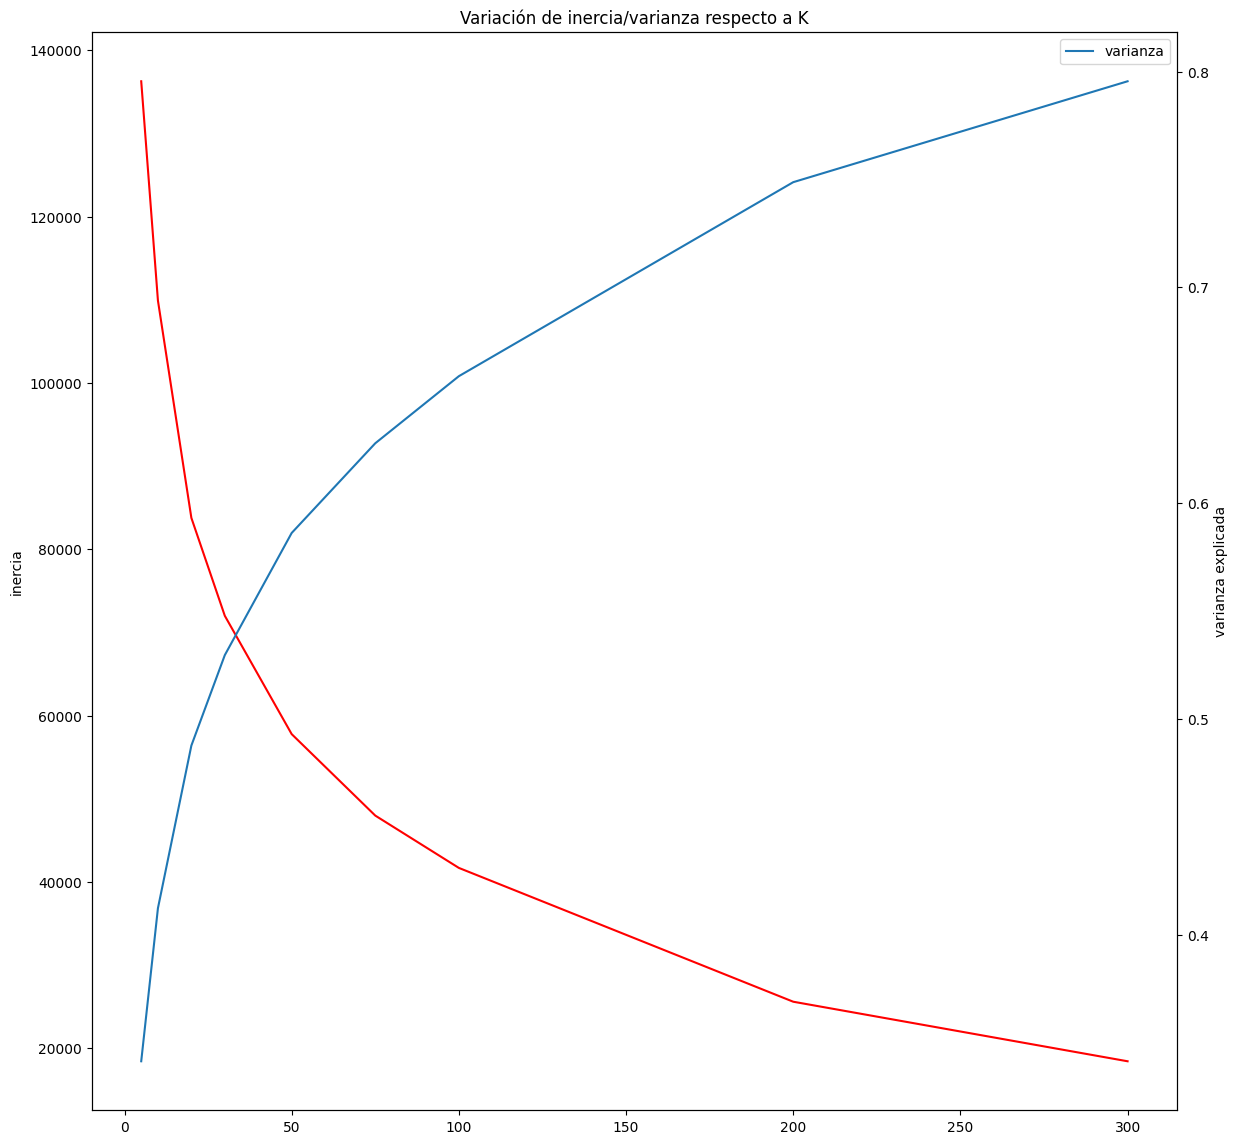

In [ ]:

fig, ax1 = plt.subplots()

ax1.plot(
    [c[0] for c in resultados_k.items()],
    [c[1][0] for c in resultados_k.items()], label="inercia", color="red")
ax1.set_ylabel('inercia')

ax2 = ax1.twinx()
ax2.plot(
    [c[0] for c in resultados_k.items()],
    [c[1][1] for c in resultados_k.items()], label="varianza")
ax2.set_ylabel('varianza explicada')

plt.xlabel("K")
plt.legend()
plt.title("Variación de inercia/varianza respecto a K");
#Para este caso en concreto, un valor de K=100 o 150, podria ser una buena opción si no hubiese ningún otro requisito.